<a href="https://colab.research.google.com/github/ashokkondhalkar/CAPSTONE-1-Hotel-Booking-Analysis-EDA/blob/main/Individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing all neccesary python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Mount drive
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Providing file path & we are using pd.read_csv is used to load a CSV file as a pandas dataframe
file_path="/content/drive/MyDrive/AlmaBetter/Modules/ Topic/CAPSTONE-1-Hotel-Booking-Analysis-EDA/Hotel Bookings.csv"
hotel_df=pd.read_csv(file_path)

#Reading and Inspection

In [ ]:
# .head() function in Python displays the first five rows of the dataframe by default
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# .shape function shows DataFrame is made up of 119390 rows and 32 columns of data.
hotel_df.shape

(119390, 32)

In [ ]:
# .columns() function in Python displays the number of columns present in DataFrame   
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# .describe() function in Python Provides information about statistical aspects of the DataFrame
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# .info() function Provides information about Dtype
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

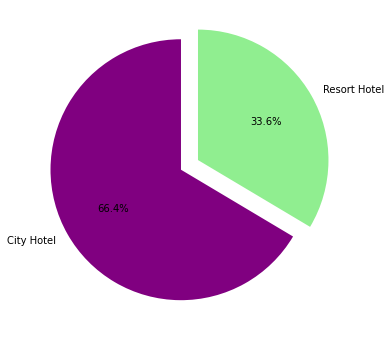

In [ ]:
#Lets make pie chart to view percentage Resort Hotel & City Hotel percentage
#provide size to pie chart
plt.rcParams['figure.figsize'] = 6,6

#.value_counts() function counts value and .index gives name
pie_hotel=hotel_df['hotel'].value_counts().index

#fill colors in pie chart
colors = ['purple', 'lightgreen']

#counts value between Resort Hotel and city Hotel 
pie_size = hotel_df['hotel'].value_counts()

#how much each section seprated from each other
gap= (0,0.15)

plt.pie(pie_size,explode=gap,labels=pie_hotel, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 10})
plt.show()

#Data Cleaning

In [ ]:
#checking missing value in columns
#.isna() or .isnull() function gives information about null values
hotel_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#DataFrame having 32 columns like 'children', 'company', 'country' and 'agent' have some null values.

In [ ]:
#column wise percentage with 2 decimal places
round(100*(hotel_df.isna().sum()/len(hotel_df.index)),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [ ]:
#lets make a copy of original DataFrame(Avoid any changes in original DataFrame)
hotel1=hotel_df.copy()

In [ ]:
#lets find unique values if any
hotel1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel1['is_canceled'].unique()

array([0, 1])

In [ ]:
hotel1['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
#column childern having 0 as well as null values
hotel1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
hotel1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

#1.Removing Dublicate Row values if any










In [ ]:
hotel1.drop_duplicates(inplace = True)

In [ ]:
hotel1[hotel1.duplicated()].shape

(0, 32)

In [ ]:
hotel1.shape

(87396, 32)

#2.Handling missing values

In [ ]:
#sort values in ascending order
hotel1.isnull().sum().sort_values(ascending = True)

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


In [ ]:
#sort values in decending order
hotel1.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

In [ ]:
print(hotel1['company'].unique()) 
#company having nan values

print(hotel1['agent'].unique())
#agent having nan values

print(hotel1['children'].unique())
#children having nan values

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [ ]:
 #For better calculation need to replace nan values by 0 
hotel1['company'] = hotel1['company'].fillna(0)
hotel1['agent'] = hotel1['agent'].fillna(0)

#For better calculation need to replace nan values by by its mean 
hotel1['children'].fillna(hotel1['children'].mean(),inplace=True)

print(hotel1['country'].isna().sum())

452


In [ ]:
#only 'country' is remaing having null value so replace null value with 'some'
hotel1['country'].fillna('some',inplace=True)

#lets find if any null value remaing
hotel1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

#3.converting column to appropriate datatype

In [ ]:
#convert float datatype to interger
hotel1['children']=hotel1['children'].astype('int64')
hotel1['agent']=hotel1['agent'].astype('int64')
hotel1['company']=hotel1['company'].astype('int64')

In [ ]:
#changing reservation_status_date to dataframe and store value in reservation_status_date

In [ ]:
hotel1['reservation_status_date'] = pd.to_datetime(hotel1['reservation_status_date'], format = '%Y-%m-%d')

#4.Add important columns



In [ ]:
#making new column for total_stays days in hotel
print(hotel1['stays_in_week_nights'])
print(hotel1['stays_in_weekend_nights'])

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 87396, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 87396, dtype: int64


In [ ]:
hotel1['total_stay'] =hotel1['stays_in_week_nights']+hotel1['stays_in_weekend_nights']

In [ ]:
#making new column totle_peoples by addition of babies,adults,children
print(hotel1['babies'])
print(hotel1['adults'])
print(hotel1['children'])

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: babies, Length: 87396, dtype: int64
0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: adults, Length: 87396, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 87396, dtype: int64


In [ ]:
hotel1['totle_peoples']=hotel1['babies']+hotel1['adults']+hotel1['children']

EDA

In [ ]:
#Lets first find the correlation between the numerical data

In [ ]:
hotel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

In [ ]:
'''let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.
 So no need correction for this data
 Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.
'''


"let eliminate columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type.\n So no need correction for this data\n Also, we have added total_stay and total_peoples columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.\n"

In [ ]:
corel_df = hotel1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','totle_peoples']]


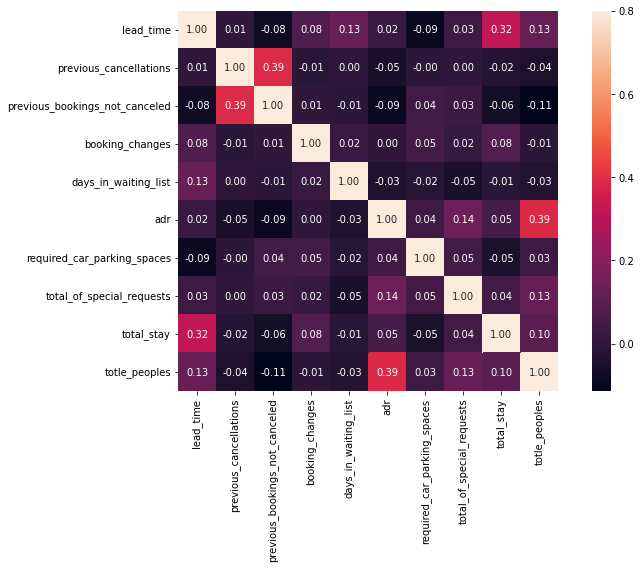

In [ ]:
#correlation matrix
cor_matrix = corel_df .corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(cor_matrix,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

In [ ]:
#Here adr is corelated with totle_peoples.if no peoples increases then revenue must be increses.so adr(average daily rate) will be more

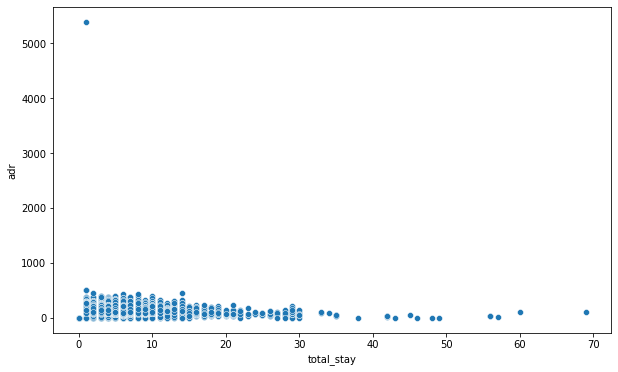

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()

In [ ]:
#here we are just apply condition for better scatterplot
hotel1.drop(hotel1[hotel1['adr']>2000].index,inplace=True)

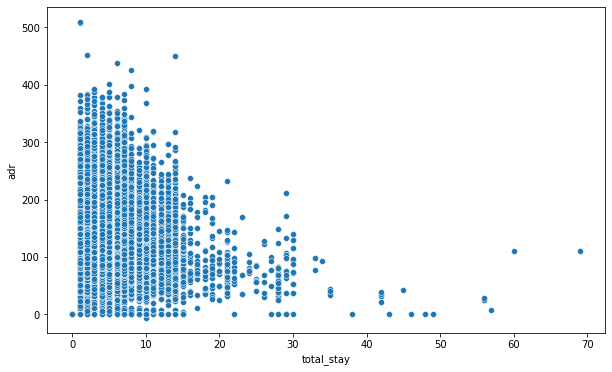

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel1)
plt.show()

Q1) Find which hotel has higher lead time?Also find what is preferred stay in 
each hotel?

In [ ]:
hotel1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'totle_peoples'],
      dtype='object')

In [ ]:
make_group=hotel1.groupby('hotel') #making group of hotel

In [ ]:
lead_time=make_group['lead_time'].median().reset_index()
pd.DataFrame(lead_time)
#lead time of city hotel is more than Resort Hotel

,hotel,lead_time
0,City Hotel,50.0
1,Resort Hotel,47.0


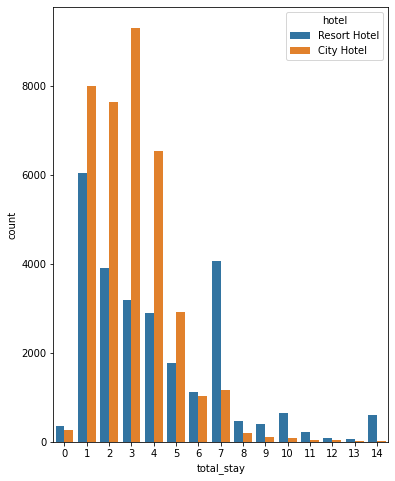

In [ ]:
#find hotel having zero calcelations
zero_cancel=hotel1[hotel1['is_canceled']==0]  
# if stay length greater than 15 days
condition=zero_cancel[zero_cancel['total_stay']<15]

#provide figure size
plt.figure(figsize=(6,8))
sns.countplot(x=condition['total_stay'],hue=condition['hotel'])
plt.show()

In [ ]:
#from above Analysis we found  that resort hotel having longer stay compaired to city hotel.i.e.For short stay peoples are choose City Hotel

Q2) Find which hotel has higher bookings cancellation rate.

In [ ]:
#find hotel having cancellation
hotel_cancel=hotel1[hotel1['is_canceled']==1]  

#make a group with hotel to identify hotel
hotel_cancel_group=hotel_cancel.groupby('hotel')

#convert to Dataframe & count hotel
x=pd.DataFrame(hotel_cancel_group.size()).rename(columns = {0:'Totle cancelled bookings'})
x

,Totle cancelled bookings
hotel,
City Hotel,16048
Resort Hotel,7976


In [ ]:
#making group of hotel
make_group=hotel1.groupby('hotel') 
#convert to Dataframe & counting totle no of bookings
y=pd.DataFrame(make_group.size()).rename(columns={0:'Totle bookings'})
y

,Totle bookings
hotel,
City Hotel,53427
Resort Hotel,33968


In [ ]:
#concat x & y with z
z=pd.concat([x,y],axis=1)
z

,Totle cancelled bookings,Totle bookings
hotel,,
City Hotel,16048,53427
Resort Hotel,7976,33968


In [ ]:
#calculate cancelled percentage
#percentage=(totle cancelled_bookins /totle bookings)*100

z['cancel_percentage']=round((z['Totle cancelled bookings']/z['Totle bookings'])*100,2)
z['cancel_percentage']

hotel
City Hotel      30.04
Resort Hotel    23.48
Name: cancel_percentage, dtype: float64

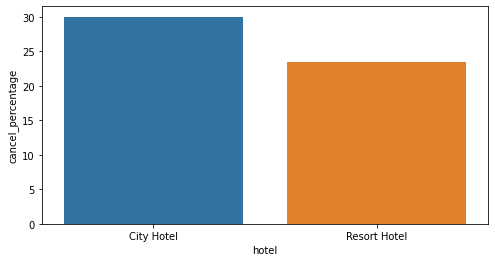

In [ ]:
#providing size to barplot
plt.figure(figsize = (8,4))
sns.barplot(x = z.index, y = z['cancel_percentage'])
plt.show()

Q3) Find which distribution channel has longer average waiting time?

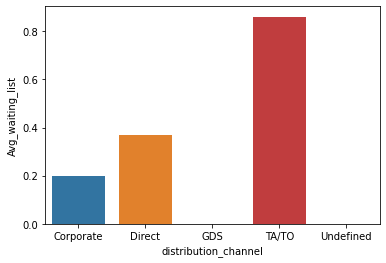

In [ ]:
#Make group of distribution_channel and days_in_waiting_list ,find mean of days_in_waiting_list and rename column name
pp=hotel1.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index().rename(columns={'days_in_waiting_list':'Avg_waiting_list'})
#convert to DataFrame with round upto 2 decimal places apply
w=pd.DataFrame(round(pp,2))
#providing size to barplot and show barplot
plt.figure(figsize=(6,4))
sns.barplot(x=w['distribution_channel'],y=w['Avg_waiting_list'])
plt.show()

In [ ]:
hotel1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay',
       'totle_peoples'],
      dtype='object')

Q4)Find which month have high revenue?

In [ ]:
hotel1['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 87395, dtype: object

In [ ]:
#making list of months available in year
month_in_year=['January', 'February','March','April','May','June','July','August','September','October','November','December']

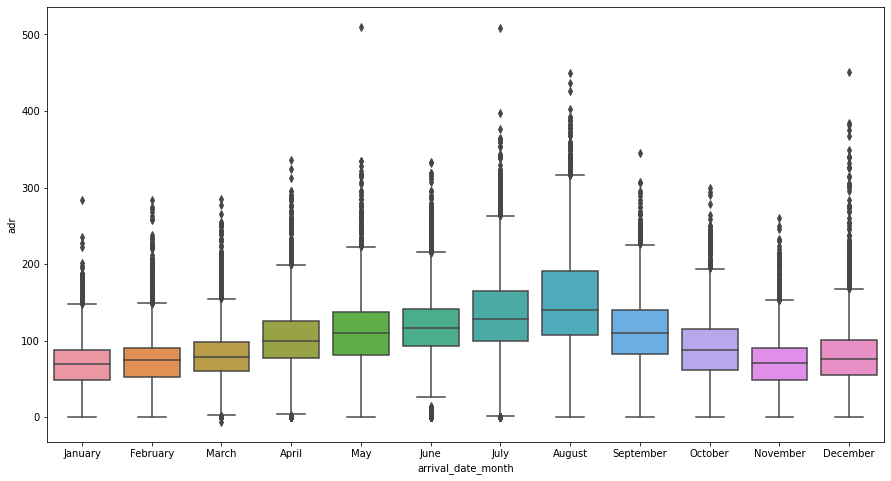

In [ ]:
#Here we are using .Categorical function in pandas which return categorical variables in statistics
hotel1['arrival_date_month']=pd.Categorical(hotel1['arrival_date_month'],categories=month_in_year,ordered=True)

#providing size to figure 
plt.figure(figsize = (15,8))
#print on x-axis 'arrival_date_month' and y axis 'adr'
sns.boxplot(x = hotel1['arrival_date_month'],y = hotel1['adr'])
plt.show()

find avg daily rate per person

In [ ]:
hotel1['adr1']=round(hotel1['adr']/hotel1['totle_peoples'],2)


In [ ]:
hotel1['totle_peoples']

In [ ]:
hotel1.head()